# Технологии разведочного анализа и обработки данных
Задача №4.
Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски.
Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков?

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
from sklearn.datasets import load_wine

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [274]:
df.shape
df.dtypes

,0
alcohol,float64
malic_acid,float64
ash,float64
alcalinity_of_ash,float64
magnesium,float64
total_phenols,float64
flavanoids,float64
nonflavanoid_phenols,float64
proanthocyanins,float64
color_intensity,float64


Проверка пропусков

In [275]:
df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


Вывод: Пропусков нет

In [276]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Построение графиков разведочного анализа данных
### График 1 — Гистограмма
(ИУ5Ц-82Б - для произвольной колонки данных построить гистограмму)
Возьмём колонку алкоголь

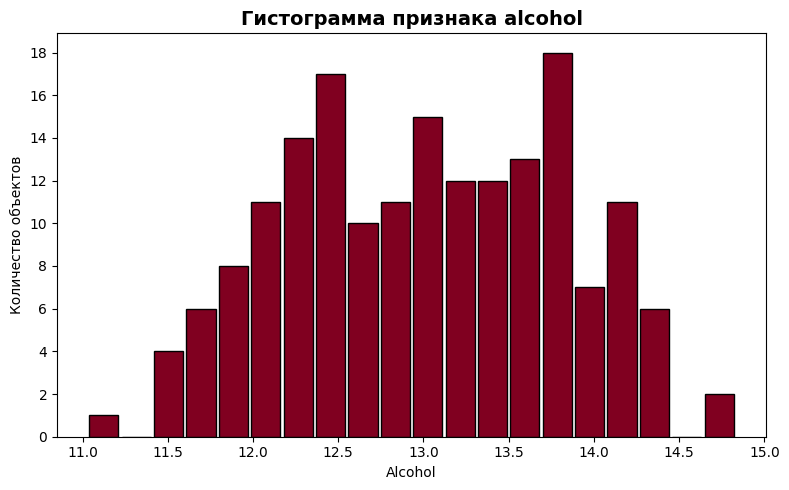

In [277]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(8, 5))

df['alcohol'].hist(bins=20, color='#800020', edgecolor='black', rwidth=0.9)

plt.title('Гистограмма признака alcohol', fontsize=14, fontweight='bold')
plt.xlabel('Alcohol')
plt.ylabel('Количество объектов')
plt.grid(False)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

###ВЫВОДЫ:
Минимум: 11.0%, Максимум: ~13.7%

Большинство вин имеют градус алкоголя: 12.5% и 13.7%

### График 2 — Boxplot

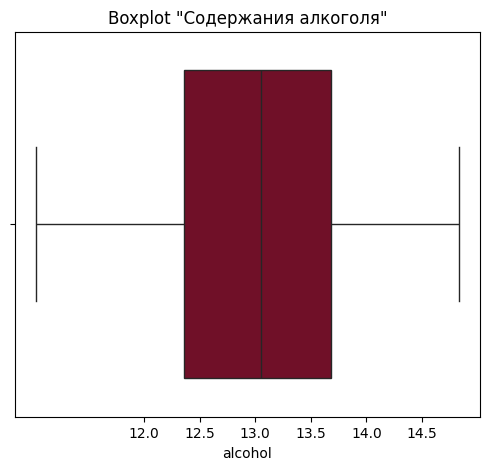

In [278]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['alcohol'], color='#800020')
plt.xticks(np.arange(12.0, 15.0, 0.5))
plt.title('Boxplot "Содержания алкоголя"')
plt.show()

ВЫВОД: Данный график показывает медиану в 13%. Полный диапазон значений составляет 11.0–14.9%

 Межквартильный размах: 12.4–13.7%

## График 3 — Диаграмма рассеяния для зависимости интенсивности цвета от яблочной кислоты

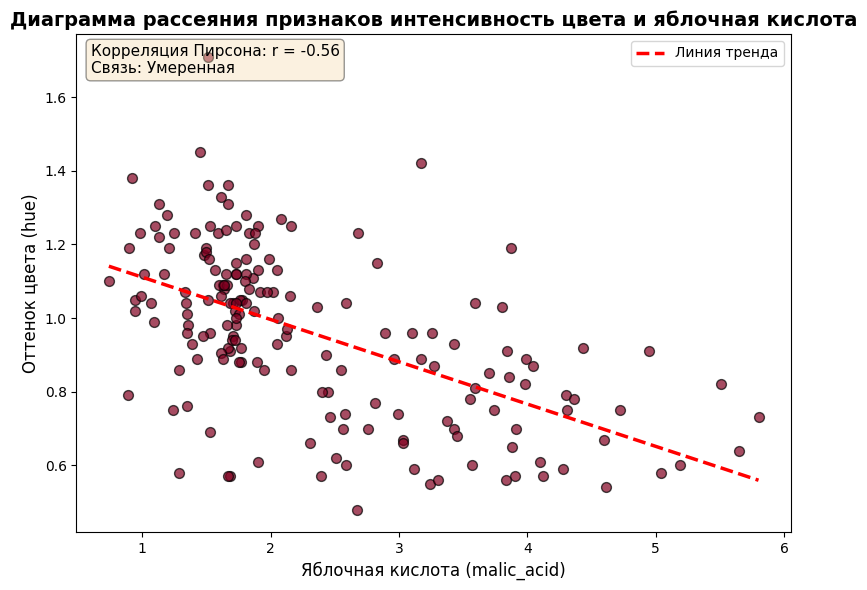

Корреляция между malic_acid и hue: -0.561


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

plt.figure(figsize=(8, 6))

plt.scatter(df['malic_acid'], df['hue'],
            color='#800020', edgecolors='black', alpha=0.7, s=50)

z = np.polyfit(df['malic_acid'], df['hue'], 1)
p = np.poly1d(z)
plt.plot(df['malic_acid'].sort_values(),
         p(df['malic_acid'].sort_values()),
         color='red', linestyle='--', linewidth=2.5,
         label=f'Линия тренда')

# Статистика
corr, _ = pearsonr(df['malic_acid'], df['hue'])
stats_text = (f"Корреляция Пирсона: r = {corr:.2f}\n"
              f"Связь: {'Сильная' if abs(corr) > 0.7 else 'Умеренная' if abs(corr) > 0.5 else 'Средняя' if abs(corr) > 0.3 else 'Слабая'}")

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top', horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.4))

plt.xlabel('Яблочная кислота (malic_acid)', fontsize=12)
plt.ylabel('Оттенок цвета (hue)', fontsize=12)
plt.title('Диаграмма рассеяния признаков интенсивность цвета и яблочная кислота', fontsize=14, fontweight='bold')

plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

print(f"Корреляция между malic_acid и hue: {corr:.3f}")

Имеется отрицательная корреляция между уровнем яблочной кислотой в составе. Чем слабее цвет вина, тем больше в нем яблочной кислоты

### Терпкость и алкоголь по типам вин

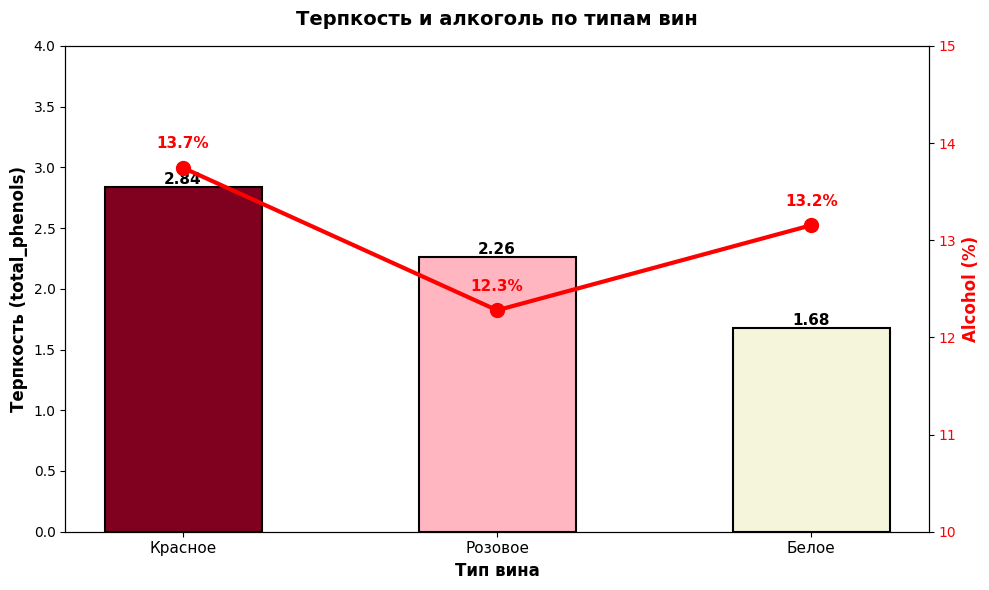

In [280]:
import matplotlib.pyplot as plt
import numpy as np

class_means = df.groupby('target')[['total_phenols', 'alcohol']].mean()

wine_types = ['Красное', 'Розовое', 'Белое']
wine_colors = ['#800020', '#FFB6C1', '#F5F5DC']

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(3)
width = 0.5

bars = ax.bar(x, class_means['total_phenols'], width,
              color=wine_colors, edgecolor='black', linewidth=1.5)

ax.set_xlabel('Тип вина', fontsize=12, fontweight='bold')
ax.set_ylabel('Терпкость (total_phenols)', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(wine_types, fontsize=11)
ax.set_ylim(0, 4)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2 = ax.twinx()
ax2.plot(x, class_means['alcohol'], color='#FF0000', marker='o',
         linewidth=3, markersize=10, label='Alcohol (%)')
ax2.set_ylabel('Alcohol (%)', fontsize=12, fontweight='bold', color='#FF0000')
ax2.tick_params(axis='y', labelcolor='#FF0000')
ax2.set_ylim(10, 15)

for i, val in enumerate(class_means['alcohol']):
    ax2.text(i, val + 0.2, f'{val:.1f}%', ha='center', fontsize=11,
             fontweight='bold', color='#FF0000')

plt.title('Терпкость и алкоголь по типам вин', fontsize=14, fontweight='bold', pad=15)
plt.grid(False)
plt.tight_layout()
plt.show()


Красные вина характеризуются наибольшей средней терпкостью (2.85) и крепостью (13.74%), белые — наименьшей (1.15 и 12.37%), что обусловлено технологией производства. Розовые вина занимают промежуточное положение со средними показателями 1.80 и 13.03%, демонстрируя чёткую иерархию физико-химических профилей. Следовательно, уровни фенольных соединений и алкоголя являются информативными признаками для классификации типов вин.

### Диаграмма зависимости содержания алкоголя от интенсивности цвета

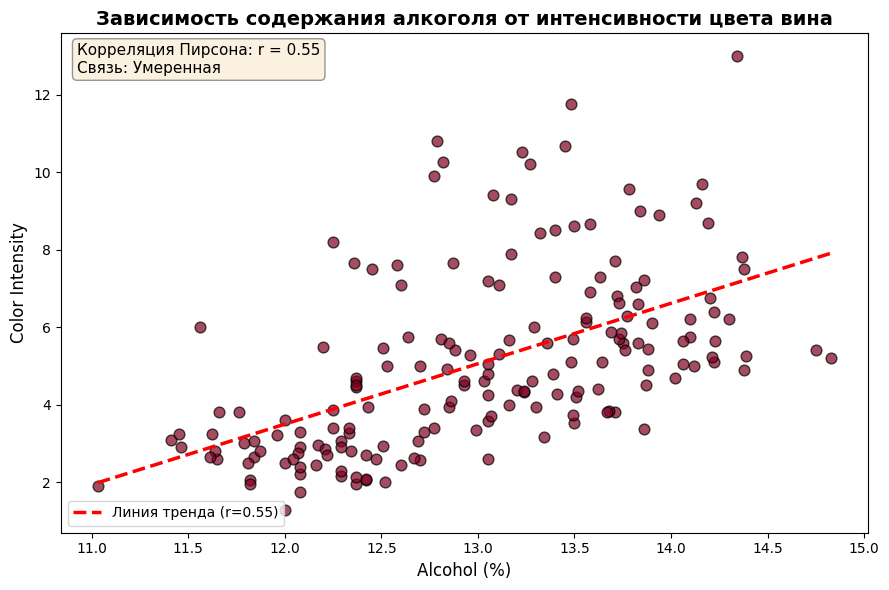

Корреляция между alcohol и color_intensity: 0.546


In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

plt.figure(figsize=(9, 6))

plt.scatter(df['alcohol'], df['color_intensity'],
            color='#800020', alpha=0.7, edgecolors='black', s=60)

# Линия тренда
z = np.polyfit(df['alcohol'], df['color_intensity'], 1)
p = np.poly1d(z)
plt.plot(df['alcohol'].sort_values(),
         p(df['alcohol'].sort_values()),
         color='red', linestyle='--', linewidth=2.5,
         label=f'Линия тренда (r={pearsonr(df["alcohol"], df["color_intensity"])[0]:.2f})')

# Статистика
corr, _ = pearsonr(df['alcohol'], df['color_intensity'])
stats_text = (f"Корреляция Пирсона: r = {corr:.2f}\n"
              f"Связь: {'Сильная' if abs(corr) > 0.7 else 'Умеренная' if abs(corr) > 0.5 else 'Средняя' if abs(corr) > 0.3 else 'Слабая'}")

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top', horizontalalignment='left',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.4))

plt.xlabel('Alcohol (%)', fontsize=12)
plt.ylabel('Color Intensity', fontsize=12)
plt.title('Зависимость содержания алкоголя от интенсивности цвета вина', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

print(f"Корреляция между alcohol и color_intensity: {corr:.3f}")

Обнаружена умеренная положительная корреляция между содержанием алкоголя и интенсивностью цвета, но корреляция не сильная (r < 0.7), что указывает на влияние дополнительных факторов: сорт винограда, регион выращивания, технология производства

### Heatmap корреляций — линейные связи между признаками

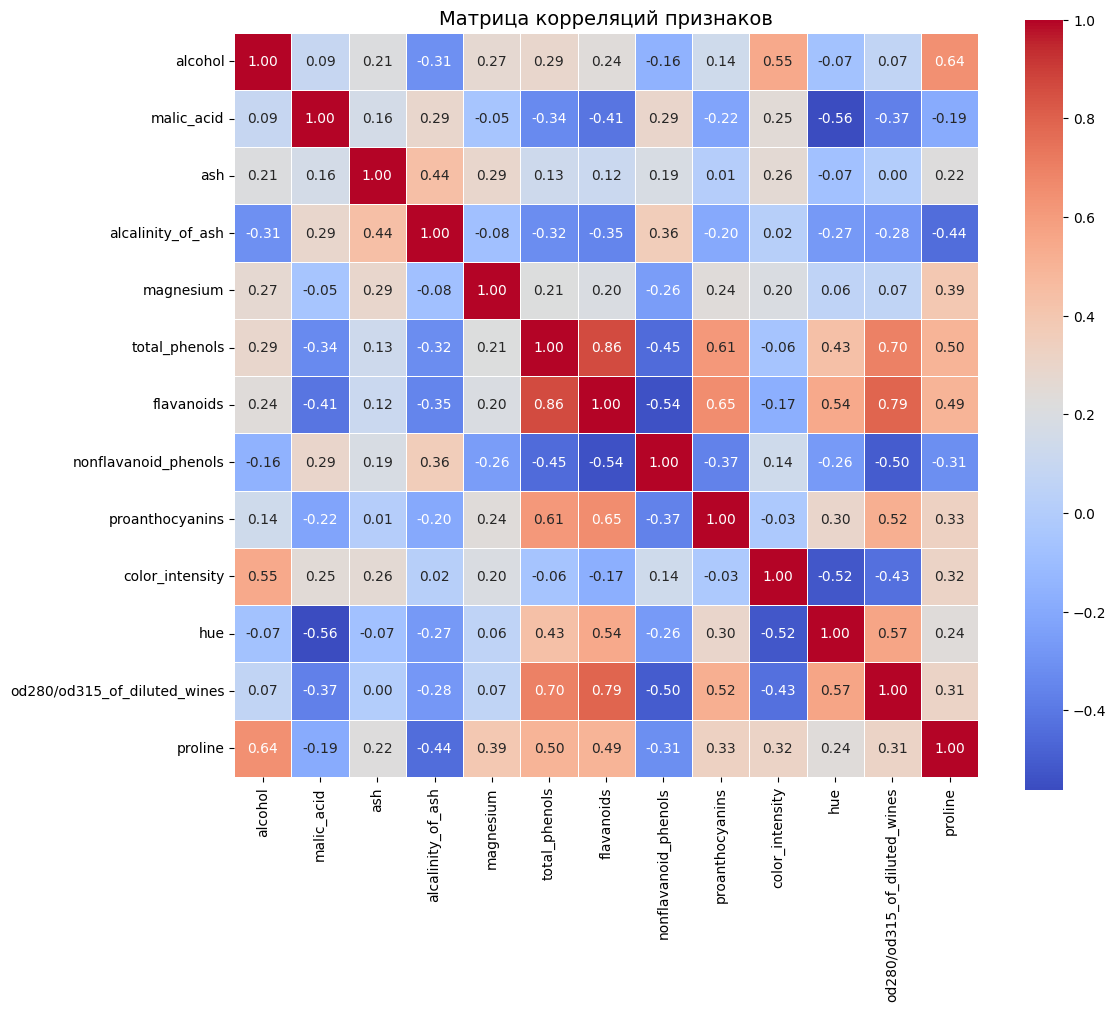

In [282]:
plt.figure(figsize=(12, 10))
corr_matrix = df.drop('target', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5)
plt.title('Матрица корреляций признаков', fontsize=14)
plt.show()

### 0.86  фенолы и флаваноиды очень тесно связаны

### 0.79  флаваноиды сильно коррелируют с оптической плотностью

### 0.65  флаваноиды хорошо коррелирует с проантоцианы

### 0.62 пролин коррелирует с уровнем алкоголя 

### -0.56 обратная корреляция между яркостью цвета вина и яблочной кислотой